# Exemplo simples do algoritmo FPGrowth

### Importação das bibliotecas

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules
import matplotlib.pyplot as plt
import networkx as nx

### Exemplo de dados

In [2]:
transactions = []
with open('groceries.csv', 'r') as file:
    for line in file:
        transaction = line.strip().split(',')  
        transactions.append(transaction)

### Conversão dos dados para o formato esperado pelo algoritmo

In [3]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

### Aplicação do algoritmo FPGrowth

In [4]:
frequent_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)

### Gráfico de barras para as top regras com maior confiança

In [5]:
def visualize_top_rules(rules, metric='confidence', top_n=10):
    rules = rules.sort_values(by=metric, ascending=False)
    total_rules = len(rules)
    print(f"Foram encontradas {total_rules} regras.")
    
    plt.figure(figsize=(10, 6))
    N = min(total_rules, top_n)
    top_rules = rules.head(N)
    plt.barh(range(N), top_rules[metric], align='center')
    plt.yticks(range(N), [f"Regra {i+1}" for i in range(N)])
    plt.xlabel(f'{metric.capitalize()}')
    plt.title(f'Top {N} Regras por {metric.capitalize()}')
    plt.gca().invert_yaxis()
    plt.show()

### Criação do gráfico de associação

In [6]:
def visualize_association_graph_top(rules, top_n=10):
    G = nx.DiGraph()

    rules = rules.sort_values(by='confidence', ascending=False)
    top_rules = rules.head(top_n)

    for idx, row in top_rules.iterrows():
        antecedent = ', '.join(list(row['antecedents']))
        consequent = ', '.join(list(row['consequents']))

        G.add_node(f"Antecedente: {antecedent}")
        G.add_node(f"Consequente: {consequent}")
        G.add_edge(f"Antecedente: {antecedent}", f"Consequente: {consequent}", weight=row['confidence'])

    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', font_weight='bold', font_size=10)
    edge_labels = {(n1, n2): f"Confiança: {G[n1][n2]['weight']:.2f}" for n1, n2 in G.edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    plt.title('Top 10 Regras de Associação com Maior Confiança')
    plt.show()

### Imprimir a top 10 regras

In [7]:
def print_top_rules(rules, metric='confidence', top_n=10):
    rules = rules.sort_values(by=metric, ascending=False)
    total_rules = len(rules)
    print(f"Foram encontradas {total_rules} regras.")
    top_rules = rules.head(top_n)
    for idx, row in top_rules.iterrows():
        antecedent = ', '.join(list(row['antecedents']))
        consequent = ', '.join(list(row['consequents']))
        confidence = row['confidence']
        print(f"Regra {idx + 1}: Antecedente: {antecedent} -> Consequente: {consequent}, Confiança: {confidence:.2f}")


### Cálculo das regras e plotagem dos gráficos

Foram encontradas 618 regras.


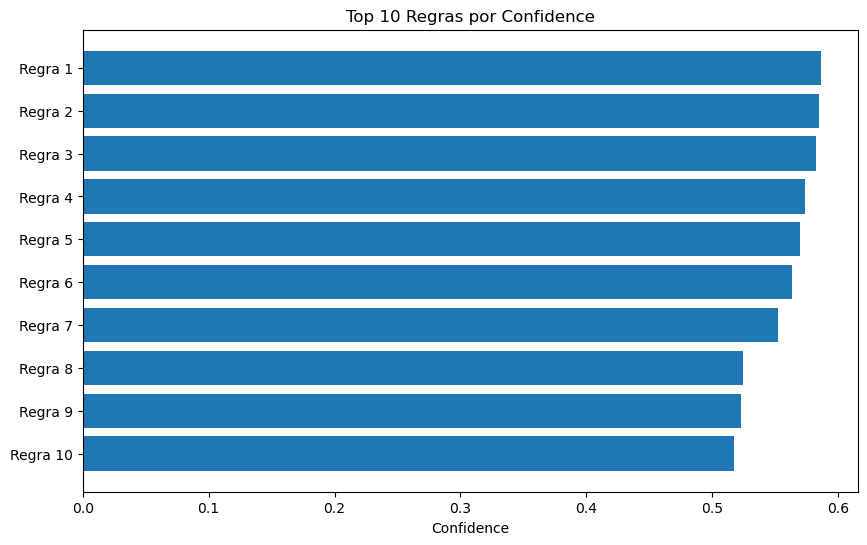

Foram encontradas 618 regras.
Regra 33: Antecedente: root vegetables, citrus fruit -> Consequente: other vegetables, Confiança: 0.59
Regra 122: Antecedente: root vegetables, tropical fruit -> Consequente: other vegetables, Confiança: 0.58
Regra 263: Antecedente: yogurt, curd -> Consequente: whole milk, Confiança: 0.58
Regra 192: Antecedente: other vegetables, butter -> Consequente: whole milk, Confiança: 0.57
Regra 127: Antecedente: root vegetables, tropical fruit -> Consequente: whole milk, Confiança: 0.57
Regra 416: Antecedente: root vegetables, yogurt -> Consequente: whole milk, Confiança: 0.56
Regra 591: Antecedente: domestic eggs, other vegetables -> Consequente: whole milk, Confiança: 0.55
Regra 538: Antecedente: whipped/sour cream, yogurt -> Consequente: whole milk, Confiança: 0.52
Regra 410: Antecedente: root vegetables, rolls/buns -> Consequente: whole milk, Confiança: 0.52
Regra 162: Antecedente: other vegetables, pip fruit -> Consequente: whole milk, Confiança: 0.52


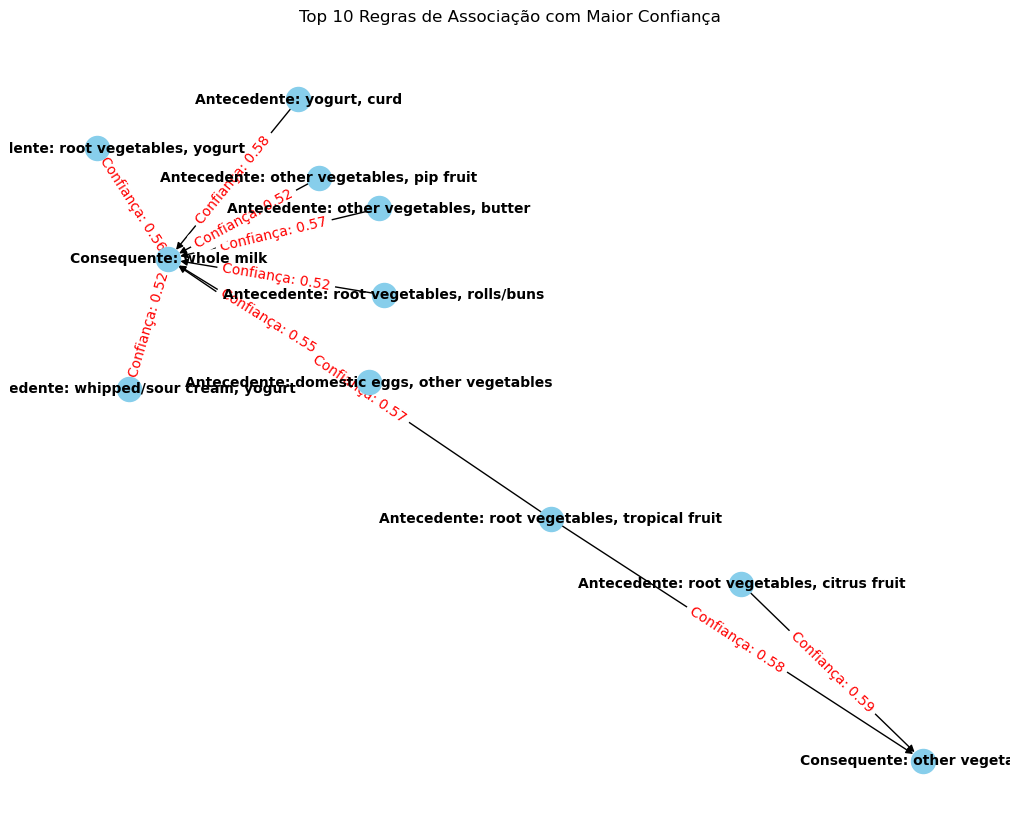

In [8]:
visualize_top_rules(rules, metric='confidence', top_n=10)

print_top_rules(rules, metric='confidence', top_n=10)
visualize_association_graph_top(rules, top_n=10)